# Features exploration

All features given are numerical (including but not limited to boolean)

In [1]:
import pandas as pd


trainDf = pd.read_csv('train.csv')
trainDf.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'output'],
      dtype='object')

## Numerical data (Not including boolean)

- BMI
- GenHlth
- MentHlth
- PhysHlth
- Age
- Education
- Income

In [2]:
trainDf.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,output
count,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,...,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000
mean,0.513883,0.493653,0.972035,29.447441,0.473225,0.050377,0.133082,0.728877,0.616025,0.801666,...,0.085879,2.702102,3.617017,5.195954,0.207061,0.447441,8.376041,4.958548,5.852836,0.356010
std,0.499857,0.500009,0.164889,7.080019,0.499332,0.218743,0.339697,0.444583,0.486400,0.398785,...,0.280213,1.106379,7.997166,9.538762,0.405240,0.497279,2.920253,1.018217,2.131317,0.478866
min,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,0.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,5.000000,0.000000,1.000000,10.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [3]:
CONTINUOUS_FEATURES = ["BMI", "Age"]
ORDINAL_FEATURES = ["GenHlth", "MentHlth", "PhysHlth", "Education", "Income"]

BOOLEAN_FEATURES = [
    col
    for col in trainDf.columns
    if col not in CONTINUOUS_FEATURES
    and col not in ORDINAL_FEATURES
    and col != "output"
]

print(f"Number of numerical features: {len(CONTINUOUS_FEATURES) + len(ORDINAL_FEATURES)}")
print(f"Number of boolean features: {len(BOOLEAN_FEATURES)}")

Number of numerical features: 7
Number of boolean features: 14


## Todo

Check outliner of BMI

In [4]:
import numpy as np
from pandas import DataFrame


class Outliner:
    def __init__(self):
        self.fitted = False

    def fit(self, df: DataFrame):
        self.Q1 = df.quantile(0.25)
        self.Q3 = df.quantile(0.75)
        self.IQR = self.Q3 - self.Q1
        self.fitted = True

    def transform(self, df):
        df = df.copy()
        df[((df < (self.Q1 - 1.5 * self.IQR)) | (df > (self.Q3 + 1.5 * self.IQR)))] = (
            np.nan
        )
        return df

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)

# Normalize data

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


stdScaler = StandardScaler()
trainDf[CONTINUOUS_FEATURES] = stdScaler.fit_transform(trainDf[CONTINUOUS_FEATURES])

minMaxScaler = MinMaxScaler()
trainDf[ORDINAL_FEATURES] = minMaxScaler.fit_transform(trainDf[ORDINAL_FEATURES])

trainDf.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,output
count,5042.000000,5042.000000,5042.000000,5.042000e+03,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,...,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5.042000e+03,5042.000000,5042.000000,5042.000000
mean,0.513883,0.493653,0.972035,-2.113872e-16,0.473225,0.050377,0.133082,0.728877,0.616025,0.801666,...,0.085879,0.425526,0.120567,0.173198,0.207061,0.447441,-5.214217e-17,0.791710,0.693262,0.356010
std,0.499857,0.500009,0.164889,1.000099e+00,0.499332,0.218743,0.339697,0.444583,0.486400,0.398785,...,0.280213,0.276595,0.266572,0.317959,0.405240,0.497279,1.000099e+00,0.203643,0.304474,0.478866
min,0.000000,0.000000,0.000000,-2.182052e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.526073e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,-6.282303e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,-4.712529e-01,0.600000,0.428571,0.000000
50%,1.000000,0.000000,1.000000,-2.044606e-01,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,2.136872e-01,0.800000,0.714286,0.000000
75%,1.000000,1.000000,1.000000,5.018222e-01,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.500000,0.066667,0.166667,0.000000,1.000000,5.561573e-01,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,9.683498e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.583567e+00,1.000000,1.000000,1.000000


# Grammatical Evolution

In [6]:
# switch directory to use grape
%cd ../grape

# import grape and necessary functions
import grape
from algorithms import ge_eaSimpleWithElitism
from functions import pdiv


# switch back to the original directory
%cd -

/home/tu/code-py/evolutionary-computation/grape
/home/tu/code-py/evolutionary-computation/mid-project


## Parameters 

In [7]:
import random 


RANDOM_SEED = 1
random.seed(RANDOM_SEED)

POPULATION_SIZE = 500
MAX_GENERATIONS = 100
P_CROSSOVER = 0.8
P_MUTATION = 0.01
HALLOFFAME_SIZE = max(round(0.01 * POPULATION_SIZE), 1)  # it should be at least 1
ELITE_SIZE = min(round(0.01 * POPULATION_SIZE), HALLOFFAME_SIZE)

CODON_CONSUMPTION = "lazy"
GENOME_REPRESENTATION = "list"
MAX_GENOME_LENGTH = None

MAX_INIT_TREE_DEPTH = 13
MIN_INIT_TREE_DEPTH = 5
MAX_TREE_DEPTH = 90
MAX_WRAPS = 0
CODON_SIZE = 255

REPORT_ITEMS = [
    "gen",
    "invalid",
    "avg",
    "std",
    "min",
    "max",
    "fitness_test",
    "best_ind_length",
    "avg_length",
    "best_ind_nodes",
    "avg_nodes",
    "best_ind_depth",
    "avg_depth",
    "avg_used_codons",
    "best_ind_used_codons",
    "selection_time",
    "generation_time",
]

## Gramma

In [8]:
grammar = grape.Grammar("./gramma.bnf")
grammar.production_rules

[[['config.<config_update>', 'non-terminal', 1, 0, True, 4]],
 [['setValue(<config_option>)', 'non-terminal', 1, 0, False, 3],
  ['<config_update>.<config_update>', 'non-terminal', 2, 1, True, 4]],
 [["'n_estimators', <n_estimators>", 'non-terminal', 1, 0, False, 2],
  ["'max_depth', <max_depth>", 'non-terminal', 1, 1, False, 2],
  ["'max_leaves', <max_leaves>", 'non-terminal', 1, 2, False, 2],
  ["'max_bin', <max_bin>", 'non-terminal', 1, 3, False, 2],
  ["'grow_policy', <grow_policy>", 'non-terminal', 1, 4, False, 2],
  ["'learning_rate', <learning_rate>", 'non-terminal', 1, 5, False, 2],
  ["'booster', <booster>", 'non-terminal', 1, 6, False, 2],
  ["'base_score', <base_score>", 'non-terminal', 1, 7, False, 2],
  ["'gamma', <gamma>", 'non-terminal', 1, 8, False, 2],
  ["'min_child_weight', <min_child_weight>", 'non-terminal', 1, 9, False, 2],
  ["'max_delta_step', <max_delta_step>", 'non-terminal', 1, 10, False, 2],
  ["'subsample', <subsample>", 'non-terminal', 1, 11, False, 2],
  

## Fitness function 

In [9]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost.core import XGBoostError


# allow config chaining
class Config:
    def __init__(self):
        self.config = {}

    def setValue(self, key, value):
        self.config[key] = value
        return self

def fitness(individual, points):
    if individual.invalid:
        return np.nan,
    
    x, Y, x_train, x_test, Y_train, Y_test = points
    
    try:
        config = Config()
        # set the config values
        eval(individual.phenotype)
        
        # set other config values
        config.setValue("objective", "binary:logistic")
        config.setValue("random_state", RANDOM_SEED)
        config.setValue("device", "gpu")
        config.setValue("validate_parameters", False)
        config.setValue("verbosity", 0)
        config.setValue("n_jobs", 8)
        
        model = xgb.XGBClassifier(**config.config)
        
        model.fit(x_train, Y_train)
        
        pred = model.predict(x_test)
        accuracy = accuracy_score(Y_test, pred)
        
        return (accuracy,)
    except (XGBoostError, ValueError) as e:
        return (np.nan,)

## Train

### Toolbox

In [10]:
from deap import creator, base, tools

toolbox = base.Toolbox()

# define a single objective, minimising fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", grape.Individual, fitness=creator.FitnessMax)

toolbox.register("populationCreator", grape.sensible_initialisation, creator.Individual)
toolbox.register("evaluate", fitness)
toolbox.register("select", tools.selTournament, tournsize=7)
toolbox.register("mate", grape.crossover_onepoint)
toolbox.register("mutate", grape.mutation_int_flip_per_codon)

### Data

In [11]:
import cupy


# train data
X_train = trainDf.drop(columns=["output"])
y_train = trainDf["output"].to_numpy()

# split the data
x_train_gpu, x_test_gpu, Y_train_gpu, Y_test_gpu = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_SEED, stratify=y_train)

# move to gpu 
x_train_gpu = cupy.asarray(x_train_gpu).get()
x_test_gpu = cupy.asarray(x_test_gpu).get()

Y_train_gpu = cupy.asarray(Y_train_gpu).get()
Y_test_gpu = cupy.asarray(Y_test_gpu).get()

In [12]:
# population and hall of fame:
population = toolbox.populationCreator(
    pop_size=POPULATION_SIZE,
    bnf_grammar=grammar,
    min_init_depth=MIN_INIT_TREE_DEPTH,
    max_init_depth=MAX_INIT_TREE_DEPTH,
    codon_size=CODON_SIZE,
    codon_consumption=CODON_CONSUMPTION,
    genome_representation=GENOME_REPRESENTATION,
)
hof = tools.HallOfFame(HALLOFFAME_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

# run the algorithm:
population, logbook = ge_eaSimpleWithElitism(
    population,
    toolbox,
    cxpb=P_CROSSOVER,
    mutpb=P_MUTATION,
    ngen=MAX_GENERATIONS,
    elite_size=ELITE_SIZE,
    bnf_grammar=grammar,
    codon_size=CODON_SIZE,
    max_tree_depth=MAX_TREE_DEPTH,
    max_genome_length=MAX_GENOME_LENGTH,
    points_train=[X_train, y_train, x_train_gpu, x_test_gpu, Y_train_gpu, Y_test_gpu],
    # points_test=[X_test, y_test],
    codon_consumption=CODON_CONSUMPTION,
    report_items=REPORT_ITEMS,
    genome_representation=GENOME_REPRESENTATION,
    stats=stats,
    halloffame=hof,
    verbose=False,
)

/home/tu/code-py/evolutionary-computation/grape/algorithms.py:124: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid them.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid them.")


gen = 0 , Best fitness = (0.7403369672943508,)


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 1 , Best fitness = (0.7452923686818632,) , Number of invalids = 134


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 2 , Best fitness = (0.7452923686818632,) , Number of invalids = 110


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 3 , Best fitness = (0.7462834489593657,) , Number of invalids = 70


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 4 , Best fitness = (0.7462834489593657,) , Number of invalids = 64


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 5 , Best fitness = (0.7482656095143707,) , Number of invalids = 59


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 6 , Best fitness = (0.7482656095143707,) , Number of invalids = 65


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 7 , Best fitness = (0.7482656095143707,) , Number of invalids = 79


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 8 , Best fitness = (0.7482656095143707,) , Number of invalids = 86


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 9 , Best fitness = (0.7482656095143707,) , Number of invalids = 84


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 10 , Best fitness = (0.7482656095143707,) , Number of invalids = 73


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 11 , Best fitness = (0.7482656095143707,) , Number of invalids = 55


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 12 , Best fitness = (0.7482656095143707,) , Number of invalids = 41


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 13 , Best fitness = (0.7482656095143707,) , Number of invalids = 27


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 14 , Best fitness = (0.7482656095143707,) , Number of invalids = 22


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 15 , Best fitness = (0.7482656095143707,) , Number of invalids = 22


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 16 , Best fitness = (0.7482656095143707,) , Number of invalids = 28


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 17 , Best fitness = (0.7492566897918731,) , Number of invalids = 18


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 18 , Best fitness = (0.7492566897918731,) , Number of invalids = 12


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 19 , Best fitness = (0.7492566897918731,) , Number of invalids = 12


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 20 , Best fitness = (0.7492566897918731,) , Number of invalids = 6


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 21 , Best fitness = (0.7512388503468781,) , Number of invalids = 4


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 22 , Best fitness = (0.7512388503468781,) , Number of invalids = 7


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 23 , Best fitness = (0.7512388503468781,) , Number of invalids = 15


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 24 , Best fitness = (0.7512388503468781,) , Number of invalids = 23


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 25 , Best fitness = (0.7512388503468781,) , Number of invalids = 33


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 26 , Best fitness = (0.7512388503468781,) , Number of invalids = 53


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 27 , Best fitness = (0.7512388503468781,) , Number of invalids = 73


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 28 , Best fitness = (0.7512388503468781,) , Number of invalids = 66


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 29 , Best fitness = (0.7512388503468781,) , Number of invalids = 57


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 30 , Best fitness = (0.7512388503468781,) , Number of invalids = 52


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 31 , Best fitness = (0.7512388503468781,) , Number of invalids = 62


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 32 , Best fitness = (0.7512388503468781,) , Number of invalids = 47


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 33 , Best fitness = (0.7512388503468781,) , Number of invalids = 38


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 34 , Best fitness = (0.7512388503468781,) , Number of invalids = 42


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 35 , Best fitness = (0.7512388503468781,) , Number of invalids = 40


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 36 , Best fitness = (0.7512388503468781,) , Number of invalids = 34


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 37 , Best fitness = (0.7512388503468781,) , Number of invalids = 38


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 38 , Best fitness = (0.7512388503468781,) , Number of invalids = 27


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 39 , Best fitness = (0.7512388503468781,) , Number of invalids = 32


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 40 , Best fitness = (0.7512388503468781,) , Number of invalids = 38


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 41 , Best fitness = (0.7512388503468781,) , Number of invalids = 33


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 42 , Best fitness = (0.7512388503468781,) , Number of invalids = 45


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 43 , Best fitness = (0.7512388503468781,) , Number of invalids = 31


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 44 , Best fitness = (0.7512388503468781,) , Number of invalids = 38


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 45 , Best fitness = (0.7512388503468781,) , Number of invalids = 37


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 46 , Best fitness = (0.7512388503468781,) , Number of invalids = 34


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 47 , Best fitness = (0.7512388503468781,) , Number of invalids = 48


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 48 , Best fitness = (0.7512388503468781,) , Number of invalids = 60


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 49 , Best fitness = (0.7512388503468781,) , Number of invalids = 39


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 50 , Best fitness = (0.7512388503468781,) , Number of invalids = 55


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 51 , Best fitness = (0.7512388503468781,) , Number of invalids = 42


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 52 , Best fitness = (0.7512388503468781,) , Number of invalids = 36


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 53 , Best fitness = (0.7512388503468781,) , Number of invalids = 40


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 54 , Best fitness = (0.7512388503468781,) , Number of invalids = 47


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 55 , Best fitness = (0.7512388503468781,) , Number of invalids = 35


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 56 , Best fitness = (0.7512388503468781,) , Number of invalids = 50


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 57 , Best fitness = (0.7512388503468781,) , Number of invalids = 50


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 58 , Best fitness = (0.7512388503468781,) , Number of invalids = 55


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 59 , Best fitness = (0.7512388503468781,) , Number of invalids = 62


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 60 , Best fitness = (0.7512388503468781,) , Number of invalids = 49


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 61 , Best fitness = (0.7512388503468781,) , Number of invalids = 51


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 62 , Best fitness = (0.7512388503468781,) , Number of invalids = 56


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 63 , Best fitness = (0.7512388503468781,) , Number of invalids = 49


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 64 , Best fitness = (0.7512388503468781,) , Number of invalids = 46


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 65 , Best fitness = (0.7522299306243806,) , Number of invalids = 60


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 66 , Best fitness = (0.7522299306243806,) , Number of invalids = 42


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 67 , Best fitness = (0.7522299306243806,) , Number of invalids = 49


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 68 , Best fitness = (0.7522299306243806,) , Number of invalids = 47


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 69 , Best fitness = (0.7522299306243806,) , Number of invalids = 32


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 70 , Best fitness = (0.7522299306243806,) , Number of invalids = 14


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 71 , Best fitness = (0.7522299306243806,) , Number of invalids = 8


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 72 , Best fitness = (0.7522299306243806,) , Number of invalids = 6


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 73 , Best fitness = (0.7522299306243806,) , Number of invalids = 9


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 74 , Best fitness = (0.7522299306243806,) , Number of invalids = 1


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 75 , Best fitness = (0.7522299306243806,) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 76 , Best fitness = (0.7522299306243806,) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 77 , Best fitness = (0.7522299306243806,) , Number of invalids = 1


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 78 , Best fitness = (0.7522299306243806,) , Number of invalids = 4


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 79 , Best fitness = (0.7522299306243806,) , Number of invalids = 1


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 80 , Best fitness = (0.7522299306243806,) , Number of invalids = 1


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 81 , Best fitness = (0.7522299306243806,) , Number of invalids = 2


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 82 , Best fitness = (0.7522299306243806,) , Number of invalids = 3


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 83 , Best fitness = (0.7522299306243806,) , Number of invalids = 3


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 84 , Best fitness = (0.7522299306243806,) , Number of invalids = 0


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 85 , Best fitness = (0.7522299306243806,) , Number of invalids = 2


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 86 , Best fitness = (0.7522299306243806,) , Number of invalids = 1


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 87 , Best fitness = (0.7522299306243806,) , Number of invalids = 2


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 88 , Best fitness = (0.7522299306243806,) , Number of invalids = 1


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 89 , Best fitness = (0.7522299306243806,) , Number of invalids = 1


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 90 , Best fitness = (0.7522299306243806,) , Number of invalids = 4


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 91 , Best fitness = (0.7522299306243806,) , Number of invalids = 1


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 92 , Best fitness = (0.7522299306243806,) , Number of invalids = 2


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 93 , Best fitness = (0.7522299306243806,) , Number of invalids = 2


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 94 , Best fitness = (0.7522299306243806,) , Number of invalids = 3


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 95 , Best fitness = (0.7522299306243806,) , Number of invalids = 2


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 96 , Best fitness = (0.7522299306243806,) , Number of invalids = 1


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 97 , Best fitness = (0.7522299306243806,) , Number of invalids = 3


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 98 , Best fitness = (0.7522299306243806,) , Number of invalids = 4


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


gen = 99 , Best fitness = (0.7522299306243806,) , Number of invalids = 2
gen = 100 , Best fitness = (0.7522299306243806,) , Number of invalids = 2


/home/tu/code-py/evolutionary-computation/grape/algorithms.py:243: UserWarning: Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.
  warnings.warn("Warning: There are valid individuals with fitness = NaN in the population. We will avoid in the statistics.")


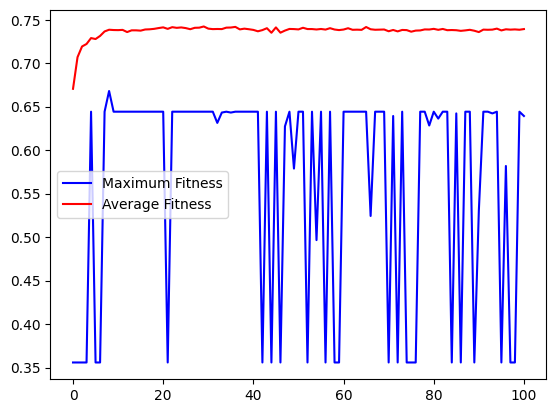

In [13]:
from matplotlib import pyplot as plt

gen = logbook.select("gen")
fit_mins = logbook.select("min")
fit_avgs = logbook.select("avg")

plt.plot(gen, fit_mins, "b-", label="Maximum Fitness")
plt.plot(gen, fit_avgs, "r-", label="Average Fitness")
plt.legend()

## Best Individual

In [14]:
import textwrap

best = hof.items[0].phenotype
print("Best individual: \n", "\n".join(textwrap.wrap(best, 80)))
print("\nTraining Fitness: ", hof.items[0].fitness.values[0])

Best individual: 
 config.setValue('max_leaves', 3).setValue('max_depth',
9).setValue('eval_metric', 'rmse').setValue('reg_alpha',
1.0).setValue('max_depth', 6).setValue('max_bin', 2).setValue('eval_metric',
'logloss').setValue('reg_alpha', 0.5).setValue('num_parallel_tree',
4).setValue('learning_rate', 0.1).setValue('max_depth', 6).setValue('gamma',
0).setValue('learning_rate', 0.2).setValue('grow_policy',
'lossguide').setValue('colsample_bylevel', 0.6).setValue('grow_policy',
'depthwise').setValue('learning_rate', 0.1).setValue('colsample_bytree',
1.0).setValue('min_child_weight', 4).setValue('max_bin',
64).setValue('num_parallel_tree', 4).setValue('learning_rate',
0.1).setValue('learning_rate', 0.1).setValue('learning_rate',
0.1).setValue('eval_metric', 'rmse').setValue('gamma',
0.5).setValue('learning_rate', 0.1).setValue('max_depth', 3).setValue('gamma',
0)

Training Fitness:  0.7522299306243806


In [15]:
print(hof.items[0].phenotype, file=open("best_individual.txt", "w+"))

### Predict

In [16]:
def gePredict(individual, X_train, y_train, X):
    config = Config()
    # set the config values
    eval(individual.phenotype)
    
    # set other config values
    config.setValue("objective", "binary:logistic")
    config.setValue("random_state", RANDOM_SEED)
    config.setValue("device", "gpu")
    config.setValue("validate_parameters", False)
    config.setValue("verbosity", 0)
    config.setValue("n_jobs", 8)
    
    model = xgb.XGBClassifier(**config.config)
    
    model.fit(X_train, y_train)
    
    return model.predict(X)


# test data 
testDf = pd.read_csv('test.csv')
testDf[CONTINUOUS_FEATURES] = stdScaler.transform(testDf[CONTINUOUS_FEATURES])
testDf[ORDINAL_FEATURES] = minMaxScaler.transform(testDf[ORDINAL_FEATURES])

X_test = testDf

res: list = gePredict(hof.items[0], X_train, y_train, X_test)

In [17]:
# make df of index, output; index [0...n-1]; output is above

outputDf = pd.DataFrame(res, columns=["output"])
outputDf["index"] = outputDf.index

outputDf = outputDf[["index", "output"]]

outputDf.to_csv("submission.csv", index=False)

